In [1]:
import numpy as np
import sewpy
import aplpy
import astropy.units as u
from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt
import aplpy
from astropy.io import fits

%matplotlib inline

/scratch/home/rwibowo/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [2]:
def runsextractor(image_file, detect_thresh=3.5, analysis_thresh=3.0):
    params = ['NUMBER', 'FLUX_ISO', 'FLUXERR_ISO', 'FLUX_AUTO', 'FLUXERR_AUTO', 'FLUX_BEST', 'FLUXERR_BEST', 'BACKGROUND', 
              'THRESHOLD', 'FLUX_MAX', 'XMAX_IMAGE', 'YMAX_IMAGE', 'XPEAK_IMAGE', 'YPEAK_IMAGE', 'ALPHAPEAK_J2000', 
              'DELTAPEAK_J2000', 'X_IMAGE', 'Y_IMAGE', 'ALPHA_SKY', 'DELTA_SKY', 'ALPHA_J2000', 'DELTA_J2000']

    config = {"DETECT_THRESH":detect_thresh, "ANALYSIS_THRESH":analysis_thresh}

    sew = sewpy.SEW(params=params, config=config)

    out = sew(image_file)
    data = out["table"]
    
    ra, dec, flux, label = data['ALPHA_J2000'], data['DELTA_J2000'], data['FLUX_MAX'], data['NUMBER'].astype('int')
    
    return ra, dec, flux, label

In [3]:
B3 = "./images/uid___A002_X969646_X1aa8.ms.split.cal-CALIBRATE_BANDPASS-J0501-0159.ms.self3.substracted.cont.image.fits"
B6 = "./images/uid___A002_X969646_X1aa8.ms.split.cal-CALIBRATE_BANDPASS-J0501-0159.ms.self3.substracted.cont.image.fits"
B7 = "./images/uid___A002_X969646_X1aa8.ms.split.cal-CALIBRATE_BANDPASS-J0501-0159.ms.self3.substracted.cont.image.fits"

In [4]:
ra, dec, flux, label = runsextractor(B3)

Ouch, SExtractor complains :
b''


In [5]:
rmsB7 = 8.4e-05
c = SkyCoord('05h01m12.8s -01d59m14s', unit=(u.hourangle, u.deg), frame='icrs')
center_x, center_y = [c.ra.value, c.dec.value]
PB = 18./3600.0 

multp = np.array([3.5, 4.5, 5, 5.5, 6, 10, 100, 1000])
lvlB3 = rmsB3*multp
lvlB6 = rmsB6*multp
lvlB7 = rmsB7*multp

indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in param

INFO: Setting slices=[0, 0] [aplpy.core]


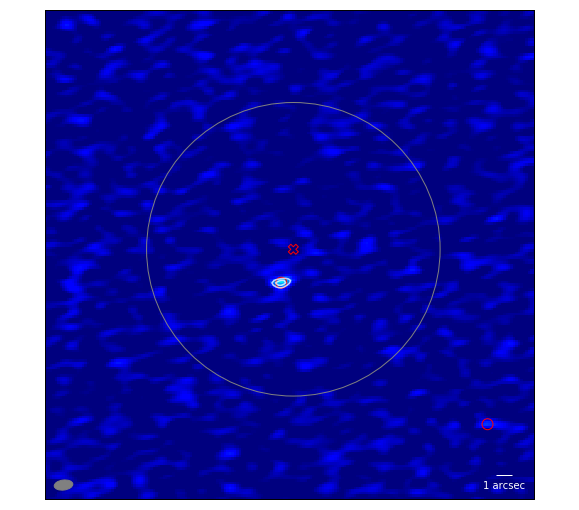

In [6]:
image = aplpy.FITSFigure(imgfile)#, figsize=(10, 10), dpi=300)

image.show_colorscale(vmin=0, vmax=0.002)
#image.show_colorscale(vmin=0)
#image.show_colorbar()
image.tick_labels.set_font(size='small')
image.show_contour(colors='white', levels=lvl, alpha=0.75)
image.hide_xaxis_label()
image.hide_yaxis_label()
image.hide_tick_labels()

image.add_beam()
image.beam.set_color('gray')
image.add_scalebar(1 * u.arcsecond)
image.scalebar.set_label('1 arcsec')
image.scalebar.set_color("white")

image.show_markers(center_x, center_y, marker='X', edgecolor="red", facecolor="none", s=100)

marker_size =  120
image.show_markers(ra, dec, edgecolor='red', facecolor='none', marker='o', s=marker_size, alpha=1.0)

# primary beam circle
image.show_circles(center_x, center_y, PB/2.0, edgecolor='gray', facecolor="none")

#image.set_title("J1139-1350 in B3")

# for i, lbl in enumerate(label):
#     image.add_label(ra[i], dec[i]-0.0004, lbl)

#image.add_label(ra[i], dec[i]-0.0004, "J1139-1350 in B3")

In [7]:
from astroquery.ned import Ned

result = Ned.query_region(c, radius=0.5*u.arcmin, equinox='J2000.0')

result

No.,Object Name,RA(deg),DEC(deg),Type,Velocity,Redshift,Redshift Flag,Magnitude and Filter,Distance (arcmin),References,Notes,Photometry Points,Positions,Redshift Points,Diameter Points,Associations
,,degrees,degrees,,km / s,,,,arcm,,,,,,,
int32,bytes30,float64,float64,object,float64,float64,object,object,float64,int32,int32,int32,int32,int32,int32,int32
1,[WMF2001] N-06-3C,75.30228,-1.98783,G,--,--,,,0.073,1,0,0,0,0,0,0
2,[WMF2001] N-06-1D,75.30267,-1.98742,G,--,--,,,0.042,1,0,0,0,0,0,0
3,[WMF2001] N-06-2D,75.30289,-1.98764,G,--,--,,,0.037,1,0,0,0,0,0,0
4,[HB89] 0458-020 ABS06,75.3031,-1.98746,AbLS,599285.0,1.999,,,0.02,2,0,0,0,0,0,0
5,[HB89] 0458-020 ABS01,75.3031,-1.98746,G,611127.0,2.0385,,,0.02,34,0,1,0,0,0,0
6,[HB89] 0458-020 ABS02,75.3031,-1.98746,AbLS,626267.0,2.089,,,0.02,5,0,0,0,0,0,0
7,[HB89] 0458-020 ABS03,75.3031,-1.98746,AbLS,467886.0,1.5607,,,0.02,2,0,0,0,0,0,0
8,[HB89] 0458-020 ABS04,75.3031,-1.98746,AbLS,266845.0,0.8901,,,0.02,2,0,0,0,0,0,0


In [8]:
ra_ned = result['RA(deg)'].data.data # "mask-type" -_-
dec_ned = result['DEC(deg)'].data.data
label = result['No.'].data.data

INFO: Setting slices=[0, 0] [aplpy.core]


indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in param

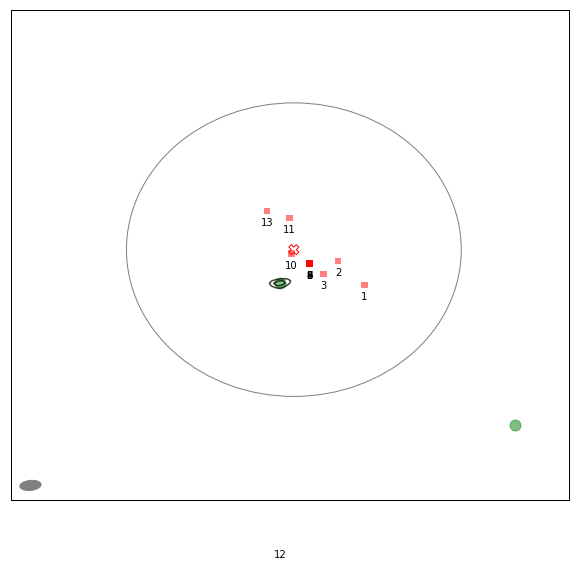

In [9]:
image = aplpy.FITSFigure(imgfile)#, figsize=(10, 10), dpi=300)

#image.show_colorscale(vmin=0, vmax=0.002)
#image.show_colorscale(vmin=0)
#image.show_colorbar()
image.tick_labels.set_font(size='small')
image.show_contour(colors='black', levels=lvl, alpha=0.75)
image.hide_xaxis_label()
image.hide_yaxis_label()
image.hide_tick_labels()

image.add_beam()
image.beam.set_color('gray')
image.add_scalebar(1 * u.arcsecond)
image.scalebar.set_label('1 arcsec')
image.scalebar.set_color("white")

image.show_markers(center_x, center_y, marker='X', edgecolor="red", facecolor="none", s=100)

marker_size =  120
image.show_markers(ra, dec, edgecolor='green', facecolor='green', marker='o', s=marker_size, alpha=0.5)

# primary beam circle
image.show_circles(center_x, center_y, PB/2.0, edgecolor='gray', facecolor="none")

#image.set_title("J1139-1350 in B3")

# for i, lbl in enumerate(label):
#     image.add_label(ra[i], dec[i]-0.0004, lbl)

#image.add_label(ra[i], dec[i]-0.0004, "J1139-1350 in B3")


image.show_markers(ra_ned, dec_ned, edgecolor='none', facecolor='red', marker='s', s=40, alpha=0.5)

for i, lbl in enumerate(label):
    image.add_label(ra_ned[i], dec_ned[i]-0.0002, lbl)